In [14]:
import pandas as pd

# load imdb csv file into dataframe
imdb = pd.read_csv("./movie_rate_adjusted_metadata.csv" )
imdb.head()

,movie_title,title_year,director_name,gross,budget,content_rating,language
0,Avatar,2009.0,James Cameron,760505847.0,237000000.0,PG-13,English
1,Pirates of the Caribbean: At World's End,2007.0,Gore Verbinski,309404152.0,300000000.0,PG-13,English
2,Spectre,2015.0,Sam Mendes,200074175.0,245000000.0,PG-13,English
3,The Dark Knight Rises,2012.0,Christopher Nolan,448130642.0,250000000.0,PG-13,English
4,John Carter,2012.0,Andrew Stanton,73058679.0,263700000.0,PG-13,English


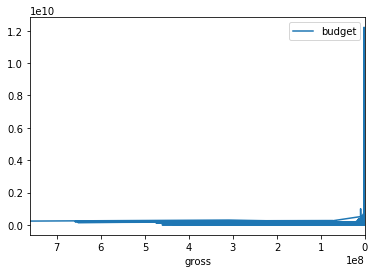

In [2]:
%matplotlib inline

imdb.plot( x='gross', y='budget')

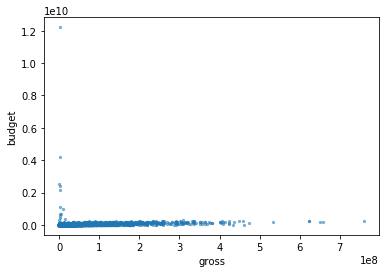

In [7]:
imdb.plot.scatter(x='gross', y='budget', s=5, alpha=0.5)

In [9]:
# here I want to see if I can make any sensible prediction for gross earnings against budget!
X = imdb.loc[:, 'budget'].values 
y = imdb.loc[:, 'gross'].values 

In [10]:
X

array([  2.37000000e+08,   3.00000000e+08,   2.45000000e+08, ...,
         7.00000000e+03,   7.00000000e+03,   1.10000000e+03])

In [11]:
# have to reshape the X axis (from 1-dimensional to 2-dimensional array)
X_shaped = X.reshape(-1, 1)
X_shaped

array([[  2.37000000e+08],
       [  3.00000000e+08],
       [  2.45000000e+08],
       ..., 
       [  7.00000000e+03],
       [  7.00000000e+03],
       [  1.10000000e+03]])

In [13]:
#conclusion :  6% prediction rate - there doesn't seem to be any kind of relationship beween budget & gross earnings..!?

from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_shaped, y, test_size=0.3, random_state=8)
knn = KNeighborsClassifier(n_neighbors=7, algorithm='auto', metric='minkowski', p=1, weights='distance')
imdb_knn_model = knn.fit(X_train, y_train) #the model/classifier
imdb_knn_model.score(X_test, y_test)

/Users/livfranzen/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.0061782877316857903